In [1]:
### Importación de librerías

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import joblib
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_recall_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

### Ajustar dimensión de dataframe 

pd.options.display.max_columns = None

In [2]:
### Leer el csv de los pinguinos

pinguinos = pd.read_csv('penguins_size.csv')

In [3]:
### Eliminar los valores nulos

imputer = SimpleImputer(strategy='most_frequent')
pinguinos.iloc[:,:] = imputer.fit_transform(pinguinos)

In [4]:
### Codificar las variables categóricas
from sklearn.preprocessing import LabelEncoder
# Convertir variables categóricas a numéricas usando Label Encoding
label_encoders = {}
for col in ['island', 'sex','species']:  # Variables categóricas
    le = LabelEncoder()
    pinguinos[col] = le.fit_transform(pinguinos[col])
    label_encoders[col] = le  # Guardamos los encoders por si se necesitan después

In [5]:
### Separar las variables independientes y dependientes

X = pinguinos.drop('species', axis=1)
y = pinguinos['species']

### Dividir el dataset en entrenamiento y prueba

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Reporte de Clasificación (SVM):

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        32
   Chinstrap       1.00      1.00      1.00        16
      Gentoo       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



<Figure size 1000x700 with 0 Axes>

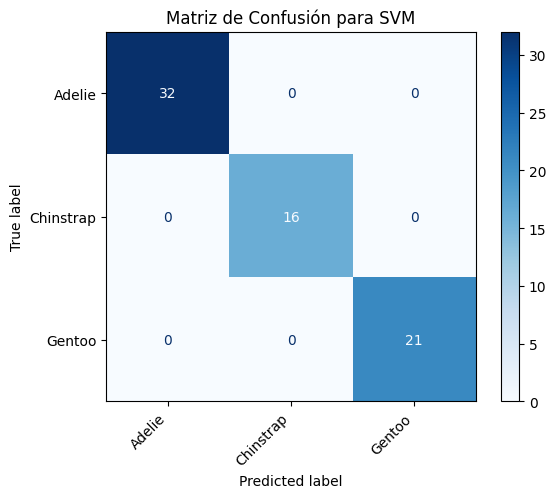

In [6]:
## Modelo SVM para clasificación multiclase

svm_model = SVC(kernel='linear', C=1, class_weight='balanced', random_state=42 ,gamma='scale')
svm_model.fit(X_train_tfidf, y_train)

## Predicción del modelo

y_pred = svm_model.predict(X_test_tfidf)

## Evaluación del modelo

print("\nReporte de Clasificación (SVM):\n")
print(classification_report(y_test, y_pred, target_names=["Adelie", "Chinstrap", "Gentoo"]))

# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Adelie", "Chinstrap", "Gentoo"])

# Graficar la matriz de confusión

plt.figure(figsize=(10, 7))
disp.plot(cmap='Blues', values_format='g')
plt.xticks(rotation=45, ha='right')
plt.title('Matriz de Confusión para SVM')
plt.show()

In [7]:
# Exportar el modelo y el encoder
joblib.dump(svm_model, 'svm_model.pkl')
# joblib.dump(le, 'label_encoder.pkl')

['svm_model.pkl']